In [1]:
import sys
sys.path.append('../src')

from module.module import Linear
from module.activation import TanH, Softmax

from loss.loss import CrossEntropie, CELogSoftmax
from networks.optim import Optim
from networks.sequentiel import Sequentiel

from utils.generation import generate_linear_data, generate_data_gauss
from utils.plots import plot_net
from utils.evaluation import accuracy
from utils.processing import one_hot_y

import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

In [2]:
data = pkl.load(open("../data/usps.pkl",'rb')) 

In [3]:
X_train = data["X_train"]
y_train = data["Y_train"]
X_test = data["X_test"]
y_test = data["Y_test"]

In [4]:
classes = len(np.unique(y_train))

input_neurons = X_train.shape[1]
output_neurons = classes

In [5]:
def accuracy_m(net, X, y):
    if X.ndim == 1:
        X = X.reshape((-1, 1))

    if y.ndim == 1:
        y = y.reshape((-1, 1))

    ypred = net(X)
    yhat = np.argmax(ypred, axis=1, keepdims=True)

    return (yhat == y).mean()

In [6]:
y_train_one_hot = one_hot_y(y_train, classes)

100%|██████████| 50/50 [00:10<00:00,  4.81it/s]


Training completed.


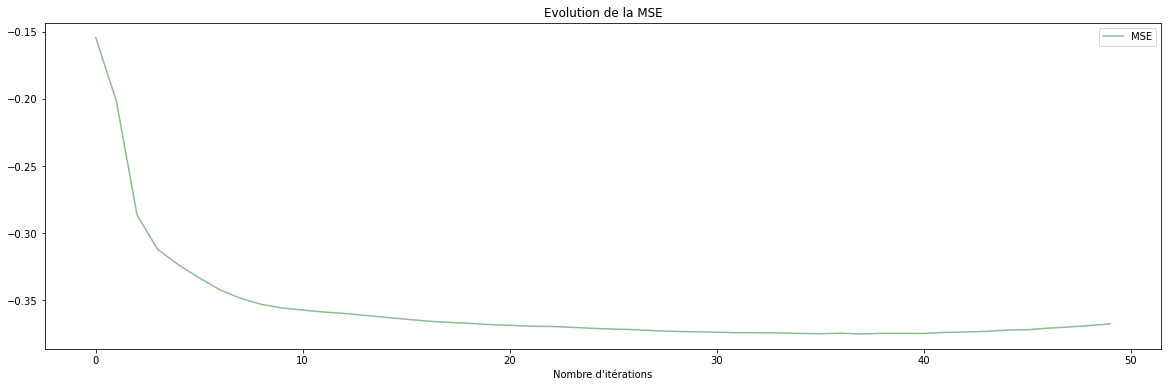

Accuracy : 0.37935463156204846


In [7]:
hidden_neurons_1 = 100
hidden_neurons_2 = 80

net = Sequentiel([
    Linear(input_neurons, hidden_neurons_1, bias=True),
    TanH(),
    Linear(hidden_neurons_1, hidden_neurons_2, bias=True),
    TanH(),
    Linear(hidden_neurons_2, output_neurons, bias=True),
    Softmax()
], neg_class=0)

optim = Optim(net, CrossEntropie(), eps=1e-3)
optim.SGD(X_train, y_train_one_hot, batch_size=50, epochs=50, verbose=False)

plot_net(X_train, y_train, net, optim.train_loss, net_type="multiclass")
print("Accuracy :", accuracy(net, X_train, y_train, multi_class=True))

100%|██████████| 50/50 [00:10<00:00,  4.89it/s]

Training completed.


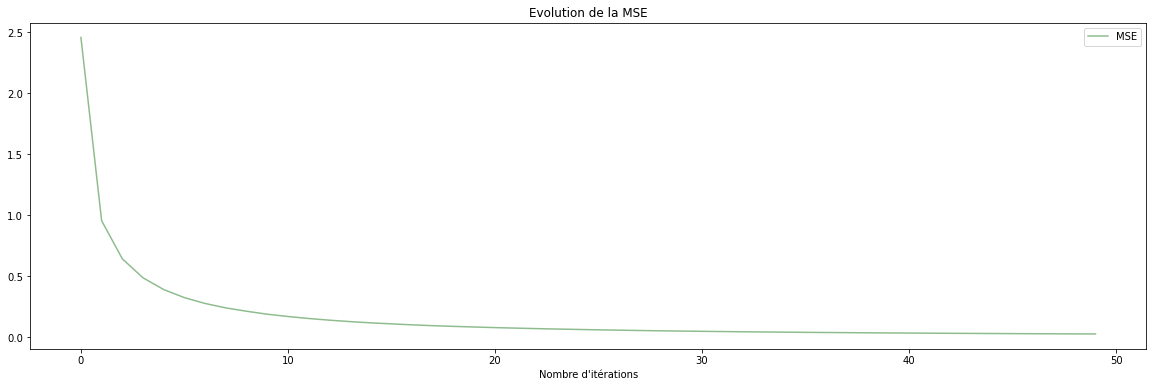

Accuracy : 0.9979129876384653


In [8]:
hidden_neurons_1 = 100
hidden_neurons_2 = 80

net = Sequentiel([
    Linear(input_neurons, hidden_neurons_1, bias=True),
    TanH(),
    Linear(hidden_neurons_1, hidden_neurons_2, bias=True),
    TanH(),
    Linear(hidden_neurons_2, output_neurons, bias=True),
], neg_class=0)

optim = Optim(net, CELogSoftmax(), eps=1e-3)
optim.SGD(X_train, y_train_one_hot, batch_size=50, epochs=50, verbose=False)

plot_net(X_train, y_train, net, optim.train_loss, net_type="multiclass")
print("Accuracy :", accuracy(net, X_train, y_train, multi_class=True))

100%|██████████| 50/50 [00:10<00:00,  4.70it/s]


Training completed.


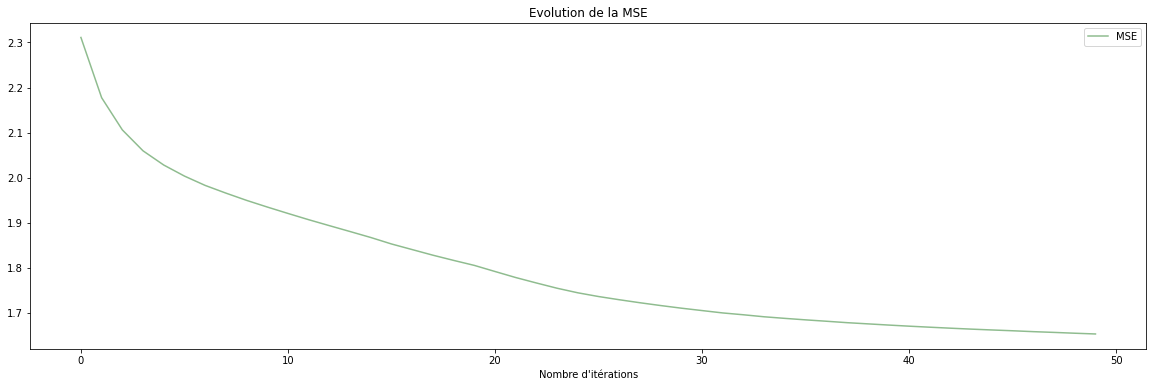

Accuracy : 0.8169850698346444


In [9]:
hidden_neurons_1 = 100
hidden_neurons_2 = 80

net = Sequentiel([
    Linear(input_neurons, hidden_neurons_1, bias=True),
    TanH(),
    Linear(hidden_neurons_1, hidden_neurons_2, bias=True),
    TanH(),
    Linear(hidden_neurons_2, output_neurons, bias=True),
    Softmax()
], neg_class=0)

optim = Optim(net, CELogSoftmax(), eps=1e-3)
optim.SGD(X_train, y_train_one_hot, batch_size=50, epochs=50, verbose=False)

plot_net(X_train, y_train, net, optim.train_loss, net_type="multiclass")
print("Accuracy :", accuracy(net, X_train, y_train, multi_class=True))